<a href="https://www.kaggle.com/code/krishnaprasad2608/netflix-film-analysis?scriptVersionId=173075032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction:**

**Netflix Evolution:**
* Established in 1997 as a DVD rental service, Netflix has evolved into a major entertainment and media company.

**Vast Content Library:**
* Boasting an extensive collection of movies and series, Netflix provides a rich dataset for exploration.

# **Objective:**

**Exploratory Data Analysis (EDA):**

* Conduct an in-depth analysis on the distribution of show types, unveiling the balance between movies and TV shows in the Netflix content catalog.
* Investigate the top 10 countries contributing to Netflix's global presence, uncovering regional preferences and diversity in the streaming platform's audience.

**Movie Duration Trends:**
* Assess the correlation between movie durations and release years, seeking patterns or shifts in viewer preferences over time.

**Python Data Analysis:**
* Dive into the top 10 genres on Netflix, unraveling the popularity and prevalence of different content categories.
* Explore the influential directors shaping the platform by analyzing the top 10 directors' contributions to Netflix's extensive library.
* These additional objectives aim to provide a comprehensive exploration of various facets within the Netflix dataset, enhancing the depth and breadth of the exploratory data analysis.

# Variable Description

* **show_id:** An integer representing the unique identification number of the show.
* **type:** A string indicating the type of the show, such as TV series or movie.
* **title:** A string denoting the title of the show.
* **director:** A string representing the director of the show.
* **cast:** A string listing the cast or actors featured in the show.
* **country:** A string specifying the country of origin for the show.
* **date_added:** A string indicating the date when the show was added to Netflix.
* **release_year:** An integer representing the year when the show was released on Netflix.
* **duration:** An integer representing the duration of the show in minutes.
* **description:** A string providing a brief description of the show.
* **genre:** A string indicating the genre or category of the show.

# Initial Analyses

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
netflix_data = pd.read_csv('/kaggle/input/film-analysis/netflix_data.csv')

In [3]:
# Display the first few rows of the dataset
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
# Get summary statistics
netflix_data.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [5]:
# Check for missing values
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [6]:
# Display data types of each column
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [7]:
# Display basic information about the dataset
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


#  Data Preparation

In [8]:
# Filter Netflix Data to Remove TV Shows
netflix_subset = netflix_data[netflix_data['type'] == 'Movie'].copy()

In [9]:
# Select specific columns for analysis
selected_columns = ["title", "country", "genre", "release_year", "duration"]

# Create a new DataFrame with selected columns for Netflix movies
netflix_movies = netflix_subset[selected_columns].copy()


In [10]:
# Filter Netflix movies to include only those shorter than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60].copy()


short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


# Movie Duration Trends:

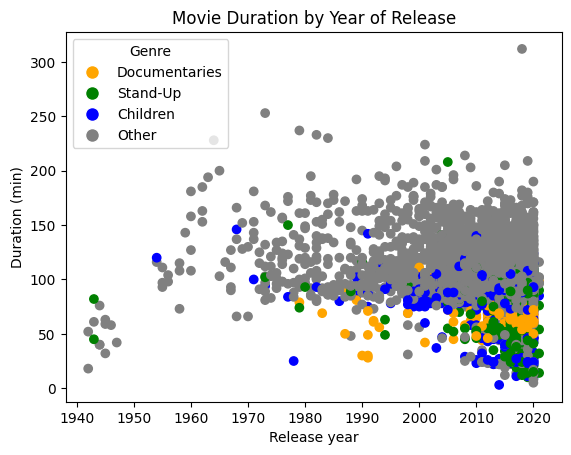

In [11]:
# Convert 'release_year' and 'duration' columns to numeric
netflix_movies['release_year'] = pd.to_numeric(netflix_movies['release_year'], errors='coerce')
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')

# Initialize an empty list to store colors
colors = []

# Initialize an empty list to store genre labels
genre_labels = []

# Iterate through rows of netflix_movies
for index, row in netflix_movies.iterrows():
    genre = row['genre']
    if genre == 'Children':
        colors.append('blue')
        genre_labels.append('Children')
    elif genre == 'Documentaries':
        colors.append('green')
        genre_labels.append('Documentaries')
    elif genre == 'Stand-Up':
        colors.append('orange')
        genre_labels.append('Stand-Up')
    else:
        colors.append('gray')
        genre_labels.append('Other')

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)

# Set axis labels and plot title
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')

# Create a custom legend with genre labels and colors
legend_labels = list(set(genre_labels))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in set(colors)]
ax.legend(legend_handles, legend_labels, title='Genre')

# Show the plot
plt.show()


**Inference**

* The scatter plot does not show a consistent trend of decreasing movie durations over the years.
* Movie durations appear to be distributed across a range of values for different release years.
* There is no apparent visual pattern suggesting a systematic decline in movie lengths.
* The colors assigned to different genres highlight the diversity in movie durations rather than a uniform decrease.
* In summary, the visual analysis does not provide evidence to support the assertion that movies are getting shorter.

# Distribution of Show Types

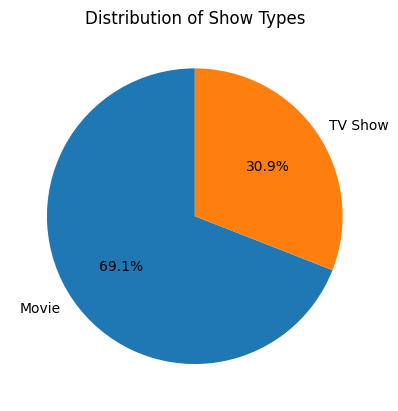

In [12]:
# Count the number of each show type
show_types_count = netflix_data['type'].value_counts()

# Plot a pie chart to show the distribution of show types
plt.pie(show_types_count, labels=show_types_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Show Types')
plt.show()

**Inferences:**
* **Dominant Show Type:** The pie plot reveals that the majority of content on the platform is composed of movies, constituting approximately 69.1% of the distribution.

* **TV Shows Presence:** TV shows, while significant, represent a substantial but smaller portion, making up the remaining 30.9% of the distribution.

* **Emphasis on Movies:** The platform seems to place a notable emphasis on offering a diverse array of movies compared to TV shows.

* **Consumer Preferences:** The preference for movies might indicate that viewers on the platform are more inclined towards on-demand, standalone content rather than serialized shows.

* **Content Variety:** The distribution highlights the importance of catering to varied audience preferences, emphasizing the need for a balanced mix of both movies and TV shows in the platform's content library.

# Top 10 Countries

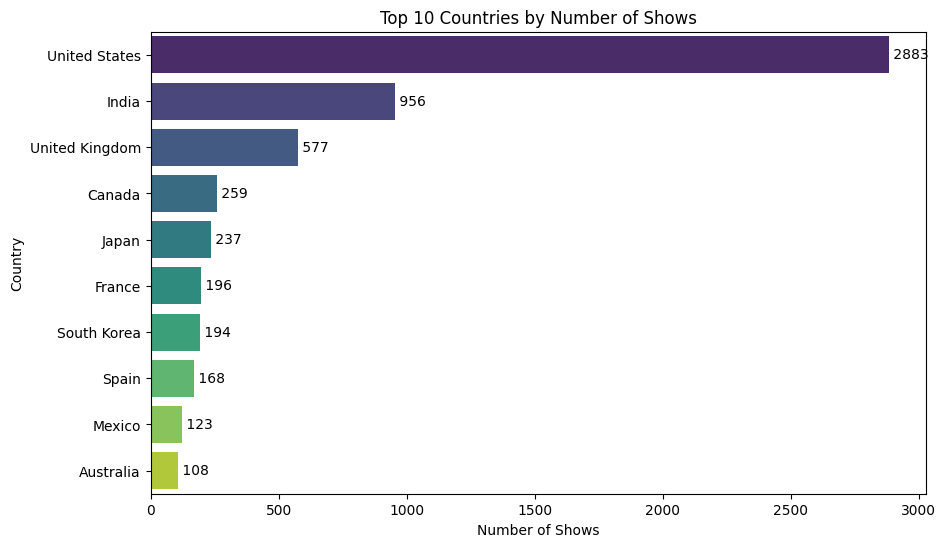

In [13]:
# Extract the top 10 countries with the highest number of shows
top_countries = netflix_data['country'].value_counts().nlargest(10)

# Plot a bar chart to show the top 10 countries by the number of shows
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add count of each bar on top
for i, value in enumerate(top_countries):
    plt.text(value, i, f' {value}', va='center', fontsize=10, color='black')

plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

**Inferences:**

* **Leading Countries:** The top countries, based on the bar charts, include the United States, India, the United Kingdom, Canada, Japan, and others.

* **US Dominance:** The United States stands out prominently, having the highest count among the top 10 countries, with a total of 2883 shows out of the dataset's 7786 entries.

* **Global Representation:** The list encompasses a diverse set of countries, reflecting the global reach and diverse content offerings on the platform.

* **Indian Influence:** India is notably represented among the leading countries, suggesting a significant presence and influence in the Netflix content library.

# Duration vs. Release Year

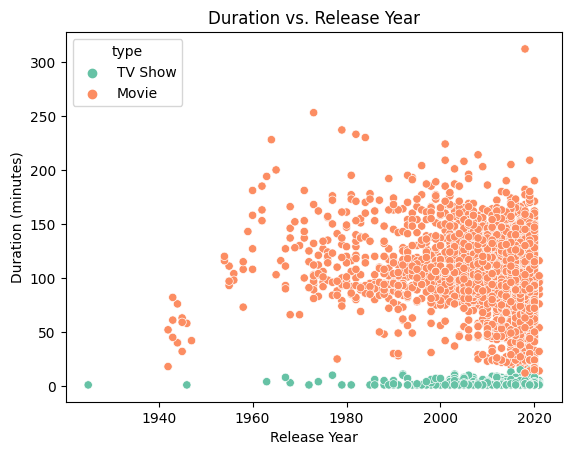

In [14]:
# Create a scatter plot to analyze the relationship between duration and release year
sns.scatterplot(x='release_year', y='duration', hue='type', data=netflix_data, palette='Set2')
plt.title('Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

**Inferences:**

* **TV Show Durations:** The scatter plot depicting Duration vs. Release Year reveals a consistent trend for TV shows, indicating that regardless of the release year, TV show durations generally stay below 40 minutes.

* **Movie Durations Range:** In contrast, movies exhibit a broader range of durations. The plot illustrates movie durations ranging from as short as 50 minutes to well beyond 250 minutes, showcasing a diverse spectrum.

* **Extreme Movie Duration:** An interesting observation is the presence of a single movie with a duration exceeding 300 minutes, indicating an outlier in the dataset with an exceptionally long runtime.

* **Stability in TV Show Durations:** The stability in TV show durations over the years suggests a standard format or convention followed for TV content, providing a predictable viewing experience.

* **Diversity in Movie Lengths:** The wide range of movie durations suggests varied storytelling approaches, catering to different genres and audience preferences, contributing to the platform's content diversity.

# Top 10 genres

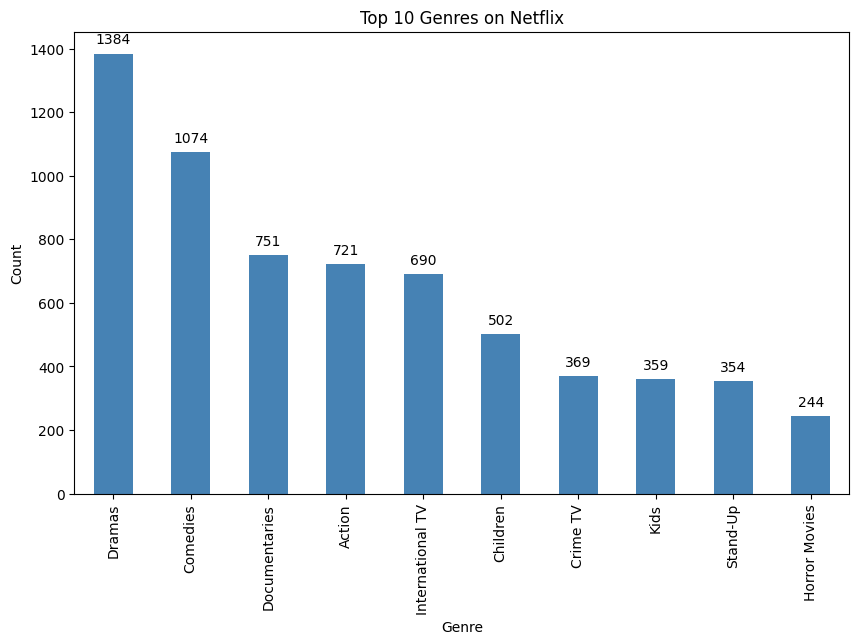

In [15]:
# Extracting individual genres from the 'genre' column
individual_genres = netflix_data['genre'].str.split(', ', expand=True).stack()

# Select the top 10 genres by count
top_genres = individual_genres.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))

# Plot a bar chart 
ax = top_genres.plot(kind='bar', color='steelblue')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

**Inferences:**

* **Leading Genres:** The bar plot depicting the Top 10 Genres on Netflix highlights that the most prevalent genres include dramas, comedies, documentaries, and action.

* **Dramas and Comedies Dominance:** Among these top genres, dramas and comedies stand out prominently, each boasting counts exceeding 1000. Dramas lead with 1384 counts, closely followed by comedies at 1074.

* **Documentaries and Action Presence:** The chart reveals a substantial presence of documentaries and action genres within the top genres, showcasing a diverse range of content offerings on the platform.

* **Popular Genres' Significance:** The high counts for dramas and comedies underscore their popularity, suggesting a strong viewer preference for narrative-driven content and humor.

# Top 10 Directors

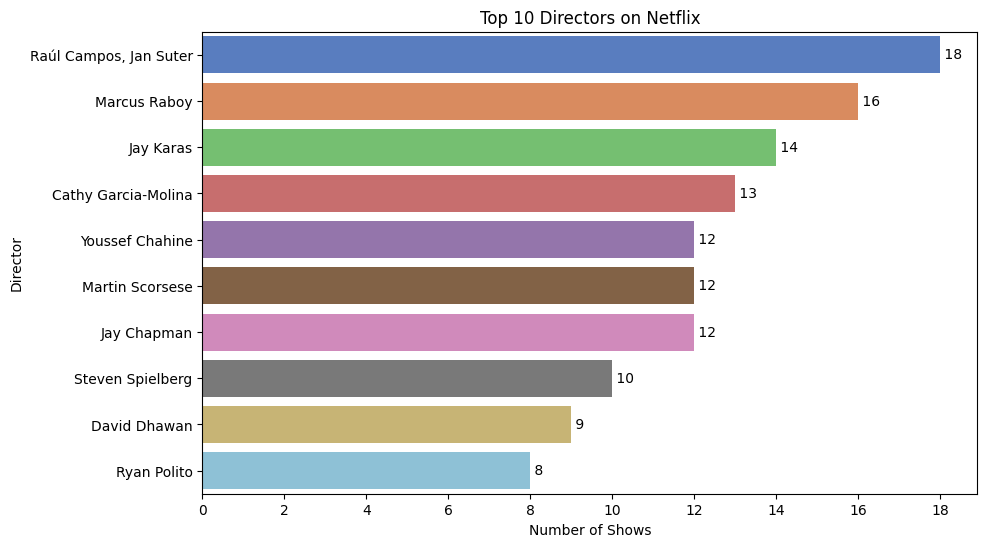

In [16]:
# Select the top 10 directors by the number of shows
top_directors = netflix_data['director'].value_counts().nlargest(10)

# Plot a bar chart to show the top 10 directors
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_directors.values, y=top_directors.index, palette='muted')

# Add count labels to each bar
for index, value in enumerate(top_directors):
    bar_plot.text(value, index, f' {value}', va='center', fontsize=10, color='black')

plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Director')

# Set custom x-axis ticks at intervals of 2, starting from 0
plt.xticks(range(0, max(top_directors.values) + 1, 2))

plt.show()

**Inferences:**

* **Prominent Directors:** The bar plot representing the Top 10 Directors on Netflix highlights the leading contributors, with Raúl Campos and Jan Suter taking the lead with 18 shows.

* **Marcus Raboy and Jay Karas:** Following closely are directors Marcus Raboy and Jay Karas, with 16 and 14 shows, respectively, showcasing their significant impact on the content available on Netflix.

* **Cathy Garcia-Molina and Youssef Chahine:** Directors Cathy Garcia-Molina and Youssef Chahine hold notable positions in the top directors' list, each credited with 13 and 12 shows, respectively.

* **Martin Scorsese, Jay Chapman, and Steven Spielberg:** Renowned filmmakers Martin Scorsese, Jay Chapman, and Steven Spielberg are also featured among the top directors, contributing 12, 12, and 10 shows, respectively.

* **David Dhawan and Ryan Polito:** The list concludes with directors David Dhawan and Ryan Polito, recognized for their contributions with 9 and 8 shows, respectively, showcasing the diversity of talent shaping Netflix's content landscape.

# Summary

* The scatter plot doesn't show a clear pattern of movies getting shorter over time, as there's a variety of movie lengths across different years
* Majority of content is movies (69.1%) vs. TV shows (30.9%).
* US leads in content production with 2883 shows, demonstrating global diversity.
* Movies vary widely in duration (50 to 250+ mins), TV shows stay consistent below 40 mins.
* Popular genres include dramas and comedies, while Raúl Campos and Jan Suter top directors with 18 shows.